<a href="https://colab.research.google.com/github/sabrina-araujoo/AnalisesSifilis/blob/main/Concat_das_duas_tabelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
xl = pd.ExcelFile('/content/gdrive/MyDrive/PROJETO/Resultados-Natal-22_06.xlsx')

In [ ]:
xl.sheet_names

['1A6',
 '1A6.15',
 '1A7',
 '1A7.15',
 '1A8',
 '1A8.15',
 '1A9',
 '1A9.15',
 '1A10',
 '1A10.15',
 '3A6',
 '3A6.15',
 '3A7',
 '3A7.15',
 '1A+6',
 '1A+6.15',
 '1A+7',
 '1A+7.15',
 '1A+8',
 '1A+8.15',
 '1A+9',
 '1A+9.15',
 '1A+10',
 '1A+10.15',
 '3A+6',
 '3A+6.15',
 '3A+7',
 '3A+7.15']

In [ ]:
eletrodo = list()
tempo = list()
polilisina = list()
paciente = list()
for i in xl.sheet_names:
  eletrodo.append(int(i[0]))
  i = i[1:]
  if (i[-3:] == ".15"):
    tempo.append(15)
    i = i[:-3]
  else:
    tempo.append(0)
  if(i[1] == "+"):
    polilisina.append("A+")
    i = i[2:]
  else:
    polilisina.append("A")
    i = i[1:]
  paciente.append(int(i[0]))
i = i[1:]

anot = pd.DataFrame({"electrode": eletrodo,
                     "time": tempo,
                     "polilysine": polilisina,
                     "pacient": paciente})
anot

,electrode,time,polilysine,pacient
0,1,0,A,6
1,1,15,A,6
2,1,0,A,7
3,1,15,A,7
4,1,0,A,8
5,1,15,A,8
6,1,0,A,9
7,1,15,A,9
8,1,0,A,1
9,1,15,A,1


In [ ]:
classificacao = dict()
classificacao["pacient"] = range(1,11)
classificacao["reaction"] = [16,8,8,8,32,0,0,0,0,0]
classificacao = pd.DataFrame(classificacao)
classificacao

,pacient,reaction
0,1,16
1,2,8
2,3,8
3,4,8
4,5,32
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [ ]:
anot = anot.join(classificacao.set_index('pacient'), on="pacient")

In [ ]:
anot.iloc[0]

electrode     1
time          0
polilysine    A
pacient       6
reaction      0
Name: 0, dtype: object

In [ ]:
allData2 = pd.DataFrame()
for i in range(len(xl.sheet_names)):
  teste = xl.parse(xl.sheet_names[i])
  teste["electrode"] = anot.iloc[i].electrode
  teste["time"] = anot.iloc[i].time
  teste["polilysine"] = anot.iloc[i].polilysine
  teste["pacient"] = anot.iloc[i].pacient
  teste["reaction"] = anot.iloc[i].reaction
  teste["read"] = range(0,len(teste))

  allData2 = pd.concat([allData2, teste])
allData2

,canal,x,y,electrode,time,polilysine,pacient,reaction,read
0,0,-0.4961,0.0023,1,0,A,6,0,0
1,1,-0.4961,0.0045,1,0,A,6,0,1
2,2,-0.4961,0.0050,1,0,A,6,0,2
3,3,-0.4961,0.0003,1,0,A,6,0,3
4,0,-0.4913,0.0018,1,0,A,6,0,4
...,...,...,...,...,...,...,...,...,...
1811,3,-0.4913,0.0005,3,15,A+,7,0,1811
1812,0,-0.4961,0.0093,3,15,A+,7,0,1812
1813,1,-0.4961,0.0105,3,15,A+,7,0,1813
1814,2,-0.4961,0.0115,3,15,A+,7,0,1814


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
xl = pd.ExcelFile('/content/gdrive/MyDrive/PROJETO/Cópia de Resultados-Natal-15_06.xlsx')

In [ ]:
xl.sheet_names

['1A1',
 '1a1.15',
 '1A+1',
 '1A+1.15',
 '1A2',
 '1a2.15',
 '1A+2.15',
 '1A+2',
 '1A3',
 '1a3.15',
 '1A+3',
 '1A+3.15',
 '1A4',
 '1a4.15',
 '1A+4',
 '1A+4.15',
 '1A5',
 '1a5.15',
 '1A+5',
 '1A+5.15',
 '3A1',
 '3A1.15',
 '3A+1',
 '3A+1.15',
 '3A2',
 '3A2.15',
 '3A+2',
 '3A+2.15',
 '3A3',
 '3A3.15',
 '3A+3',
 '3A+3.15',
 '3A4',
 '3A4.15',
 '3A+4',
 '3A+4.15',
 '3A5',
 '3A5.15',
 '3A+5',
 '3A+5.15']

In [ ]:
eletrodo = list()
tempo = list()
polilisina = list()
paciente = list()
for i in xl.sheet_names:
  eletrodo.append(int(i[0]))
  i = i[1:]
  if (i[-3:] == ".15"):
    tempo.append(15)
    i = i[:-3]
  else:
    tempo.append(0)
  if(i[1] == "+"):
    polilisina.append("A+")
    i = i[2:]
  else:
    polilisina.append("A")
    i = i[1:]
  paciente.append(int(i[0]))
  i = i[1:]


anot = pd.DataFrame({"electrode": eletrodo,
              "time": tempo,
              "polilysine": polilisina,
              "pacient": paciente})
anot

,electrode,time,polilysine,pacient
0,1,0,A,1
1,1,15,A,1
2,1,0,A+,1
3,1,15,A+,1
4,1,0,A,2
5,1,15,A,2
6,1,15,A+,2
7,1,0,A+,2
8,1,0,A,3
9,1,15,A,3


In [ ]:
classificacao = dict()
classificacao["pacient"] = range(1,11)
classificacao["reaction"] = [16,8,8,8,32,0,0,0,0,0]
classificacao = pd.DataFrame(classificacao)
classificacao

,pacient,reaction
0,1,16
1,2,8
2,3,8
3,4,8
4,5,32
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [ ]:
anot = anot.join(classificacao.set_index('pacient'), on="pacient")

In [ ]:
anot.iloc[0]

electrode      1
time           0
polilysine     A
pacient        1
reaction      16
Name: 0, dtype: object

In [ ]:
allData1 = pd.DataFrame()
for i in range(len(xl.sheet_names)):
  teste = xl.parse(xl.sheet_names[i])  # read a specific sheet to DataFrame
  teste["electrode"] = anot.iloc[i].electrode
  teste["time"] = anot.iloc[i].time
  teste["polilysine"] = anot.iloc[i].polilysine
  teste["pacient"] = anot.iloc[i].pacient
  teste["reaction"] = anot.iloc[i].reaction
  teste["read"] = range(0, len(teste))
  allData1 = pd.concat([allData1, teste])
allData1

,canal,x,y,electrode,time,polilysine,pacient,reaction,read
0,0,-0.4961,0.0043,1,0,A,1,16,0
1,1,-0.4961,0.0053,1,0,A,1,16,1
2,2,-0.4961,0.0060,1,0,A,1,16,2
3,3,-0.4961,0.0005,1,0,A,1,16,3
4,0,-0.4913,0.0030,1,0,A,1,16,4
...,...,...,...,...,...,...,...,...,...
1811,3,-0.4913,0.0005,3,15,A+,5,32,1811
1812,0,-0.4961,0.0225,3,15,A+,5,32,1812
1813,1,-0.4961,0.0238,3,15,A+,5,32,1813
1814,2,-0.4961,0.0110,3,15,A+,5,32,1814


In [ ]:
df1 = pd.DataFrame(allData1)
df2 = pd.DataFrame(allData2)

In [ ]:
pd.concat([df1, df2])

,canal,x,y,electrode,time,polilysine,pacient,reaction,read
0,0,-0.4961,0.0043,1,0,A,1,16,0
1,1,-0.4961,0.0053,1,0,A,1,16,1
2,2,-0.4961,0.0060,1,0,A,1,16,2
3,3,-0.4961,0.0005,1,0,A,1,16,3
4,0,-0.4913,0.0030,1,0,A,1,16,4
...,...,...,...,...,...,...,...,...,...
1811,3,-0.4913,0.0005,3,15,A+,7,0,1811
1812,0,-0.4961,0.0093,3,15,A+,7,0,1812
1813,1,-0.4961,0.0105,3,15,A+,7,0,1813
1814,2,-0.4961,0.0115,3,15,A+,7,0,1814


In [ ]:
allData = pd.concat([df1, df2])

In [ ]:
import seaborn as sns

In [ ]:
sns.set_pallete= sns.color_palette()

<ipython-input-66-541960eb1576>:1: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(allData[(allData.canal == 2) & (allData.time == 0) & (allData.electrode == 3) & (allData.polilysine == "A") & (allData.canal != 3)], x="read", y="y", hue="reaction", units="pacient", estimator=None, palette=sns.color_palette())


<Axes: xlabel='read', ylabel='y'>

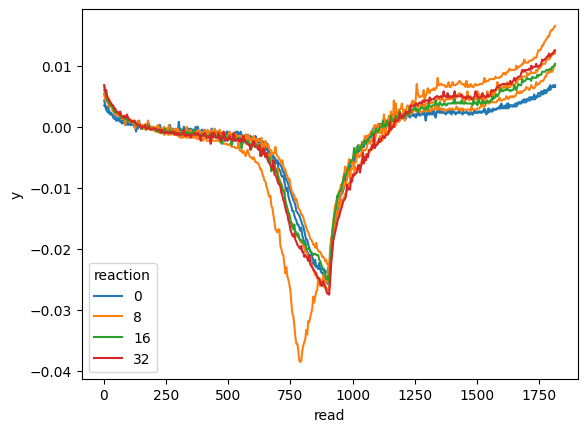

In [ ]:
sns.lineplot(allData[(allData.canal == 2) & (allData.time == 0) & (allData.electrode == 3) & (allData.polilysine == "A") & (allData.canal != 3)], x="read", y="y", hue="reaction", units="pacient", estimator=None, palette=sns.color_palette())